In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")

In [3]:
from compute_costs import *

In [4]:
compute_costs(df)

C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_drugs"] = df_school["iptsc_drugs_used_school"] * df_school["drug_type"].map(cost_dict)
C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_consumables"] = df_school["cost_IPTsc_RDTs"] + df_schoo

In [5]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [6]:
df_plot = df_pfpr[np.logical_and.reduce([
    df_pfpr["archetype"]=="Sahel",
    df_pfpr["transmission_level"]==0.2,
    np.in1d(df_pfpr["scenario_number"], [6,7,8,9,30,31,32,33])])]

In [7]:
df_itn = df_pfpr[np.logical_and.reduce([
    df_pfpr["archetype"]=="Sahel",
    df_pfpr["transmission_level"]==0.2,
    np.in1d(df_pfpr["scenario_number"], [5])])]

- Get costs of drug, operational overhead for each of the 4 school-based IPTsc approaches
- Get costs of drug, operational overhead for each of the 4 SMC approaches
- Get costs of ITNs

In [13]:
df_higher_itn = df_pfpr[np.logical_and.reduce([
    np.in1d(df_pfpr["scenario_number"], [5])])]

df_regular_itn = df_pfpr[np.logical_and.reduce([
    np.logical_not(np.in1d(df_pfpr["scenario_number"], [5]))])]

In [16]:
cost_higher_itn = (4500-3500)/5 #per 5k

In [17]:
cost_higher_itn

200.0

In [35]:
school_by_term = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [6,8])])]
school_by_month = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [7,9])])]

school_term_overhead_low = np.mean(school_by_term["cost_IPTsc_overhead_low"])
school_term_overhead_high = np.mean(school_by_term["cost_IPTsc_overhead_high"])
school_term_overhead_mean = np.mean([school_term_overhead_low, school_term_overhead_high])

school_month_overhead_low = np.mean(school_by_month["cost_IPTsc_overhead_low"])
school_month_overhead_high = np.mean(school_by_month["cost_IPTsc_overhead_high"])
school_month_overhead_mean = np.mean([school_month_overhead_low, school_month_overhead_high])

In [60]:
asaq_term = df_pfpr[np.logical_and.reduce([df_pfpr["archetype"] != "Sahel", np.in1d(df_pfpr["scenario_number"], [6])])]
asaq_month = df_pfpr[np.logical_and.reduce([df_pfpr["archetype"] != "Sahel", np.in1d(df_pfpr["scenario_number"], [7])])]
dp_term = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [8])])]
dp_month = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [9])])]
spaq_term = df_pfpr[np.logical_and.reduce([df_pfpr["archetype"] == "Sahel", np.in1d(df_pfpr["scenario_number"], [6])])]
spaq_month = df_pfpr[np.logical_and.reduce([df_pfpr["archetype"] == "Sahel", np.in1d(df_pfpr["scenario_number"], [7])])]

asaq_term_mean = np.mean(asaq_term["cost_IPTsc_drugs"])
asaq_month_mean = np.mean(asaq_month["cost_IPTsc_drugs"])

spaq_term_mean = np.mean(spaq_term["cost_IPTsc_drugs"])
spaq_month_mean = np.mean(spaq_month["cost_IPTsc_drugs"])

dp_term_mean = np.mean(dp_term["cost_IPTsc_drugs"])
dp_month_mean = np.mean(dp_month["cost_IPTsc_drugs"])

In [114]:
school_cost_dict = {
    "term": {
        "overhead": [school_term_overhead_mean/10, school_term_overhead_low/10, school_term_overhead_high/10],
        "asaq": asaq_term_mean/10,
        "spaq": spaq_term_mean/10,
        "dp": dp_term_mean/10
    },
    "month": {
        "overhead": [school_month_overhead_mean/10, school_month_overhead_low/10, school_month_overhead_high/10],
        "asaq": asaq_month_mean/10,
        "spaq": spaq_month_mean/10,
        "dp": dp_month_mean/10
    }
}

In [115]:
smc_u10 = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [30,32])])]
smc_u15 = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [31,33])])]

smc_u10_overhead_low = np.mean(smc_u10["cost_IPTsc_overhead_low"])
smc_u10_overhead_high = np.mean(smc_u10["cost_IPTsc_overhead_high"])
smc_u10_overhead_mean = np.mean([smc_u10_overhead_low, smc_u10_overhead_high])

smc_u15_overhead_low = np.mean(smc_u15["cost_IPTsc_overhead_low"])
smc_u15_overhead_high = np.mean(smc_u15["cost_IPTsc_overhead_high"])
smc_u15_overhead_mean = np.mean([smc_u15_overhead_low, smc_u15_overhead_high])

In [116]:
spaq_u10 = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [30])])]
spaq_u15 = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [31])])]
dp_u10 = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [32])])]
dp_u15 = df_pfpr[np.logical_and.reduce([np.in1d(df_pfpr["scenario_number"], [33])])]

spaq_u10_mean = np.mean(spaq_u10["cost_IPTsc_drugs"])
spaq_u15_mean = np.mean(spaq_u15["cost_IPTsc_drugs"])

dp_u10_mean = np.mean(dp_u10["cost_IPTsc_drugs"])
dp_u15_mean = np.mean(dp_u15["cost_IPTsc_drugs"])

In [117]:
smc_cost_dict = {
    "u10": {
        "overhead": [smc_u10_overhead_mean/10, smc_u10_overhead_low/10, smc_u10_overhead_high/10],
        "spaq": spaq_u10_mean/10,
        "dp": dp_u10_mean/10
    },
    "u15": {
        "overhead": [smc_u15_overhead_mean/10, smc_u15_overhead_low/10, smc_u15_overhead_high/10],
        "spaq": spaq_u15_mean/10,
        "dp": dp_u15_mean/10
    },
}

In [118]:
iptsc_cost_dict = {
    "school": school_cost_dict,
    "smc": smc_cost_dict
}

In [124]:
def make_bar_chart(values, lows, highs, xlabel=None, ylabel=None, legend=None):
    # Create a figure and axis object
    fig, ax = plt.subplots()
    
    # Create a bar chart with the given values and error bars
    bars = []
    for i in range(len(values)):
        bar = ax.bar(i, values[i])
        ax.errorbar(i, values[i], yerr=[[values[i]-lows[i]], [highs[i]-values[i]]], fmt='none', capsize=10, ecolor='black')
        bars.append(bar)
    
    # Set the x-axis limits
    ax.set_xlim(-0.5, len(values) - 0.5)
    
    # Set the y-axis limits
    ax.set_ylim(0, max(highs))
    
    # Set the x-axis tick labels
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(range(1, len(values) + 1))
    
    # Add axis labels and legend
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if legend:
        ax.legend(bars, legend)
    
    # Display the chart
    # plt.show()
    plt.savefig("impl_costs_nolabels.pdf")

meta NOT subset; don't know how to subset; dropped


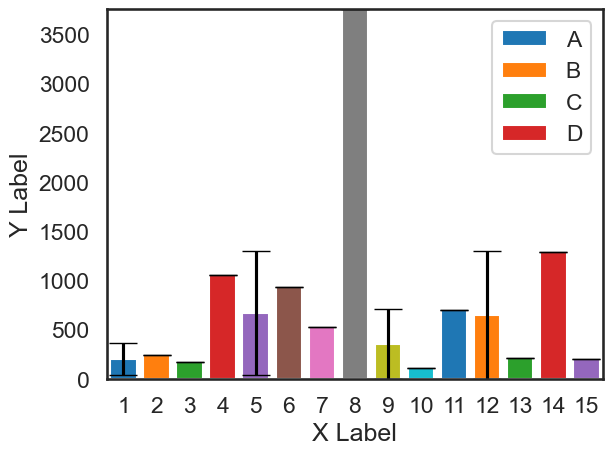

In [125]:
values = [iptsc_cost_dict["school"]["term"]["overhead"][0], iptsc_cost_dict["school"]["term"]["asaq"], iptsc_cost_dict["school"]["term"]["spaq"], iptsc_cost_dict["school"]["term"]["dp"], iptsc_cost_dict["school"]["month"]["overhead"][0], iptsc_cost_dict["school"]["month"]["asaq"], iptsc_cost_dict["school"]["month"]["spaq"], iptsc_cost_dict["school"]["month"]["dp"], iptsc_cost_dict["smc"]["u10"]["overhead"][0], iptsc_cost_dict["smc"]["u10"]["spaq"], iptsc_cost_dict["smc"]["u10"]["dp"], iptsc_cost_dict["smc"]["u15"]["overhead"][0], iptsc_cost_dict["smc"]["u15"]["spaq"], iptsc_cost_dict["smc"]["u15"]["dp"], (4500-3500)/5]
lows = [iptsc_cost_dict["school"]["term"]["overhead"][1], iptsc_cost_dict["school"]["term"]["asaq"], iptsc_cost_dict["school"]["term"]["spaq"], iptsc_cost_dict["school"]["term"]["dp"], iptsc_cost_dict["school"]["month"]["overhead"][1], iptsc_cost_dict["school"]["month"]["asaq"], iptsc_cost_dict["school"]["month"]["spaq"], iptsc_cost_dict["school"]["month"]["dp"], iptsc_cost_dict["smc"]["u10"]["overhead"][1], iptsc_cost_dict["smc"]["u10"]["spaq"], iptsc_cost_dict["smc"]["u10"]["dp"], iptsc_cost_dict["smc"]["u15"]["overhead"][1], iptsc_cost_dict["smc"]["u15"]["spaq"], iptsc_cost_dict["smc"]["u15"]["dp"], (4500-3500)/5]
highs = [iptsc_cost_dict["school"]["term"]["overhead"][2], iptsc_cost_dict["school"]["term"]["asaq"], iptsc_cost_dict["school"]["term"]["spaq"], iptsc_cost_dict["school"]["term"]["dp"], iptsc_cost_dict["school"]["month"]["overhead"][2], iptsc_cost_dict["school"]["month"]["asaq"], iptsc_cost_dict["school"]["month"]["spaq"], iptsc_cost_dict["school"]["month"]["dp"], iptsc_cost_dict["smc"]["u10"]["overhead"][2], iptsc_cost_dict["smc"]["u10"]["spaq"], iptsc_cost_dict["smc"]["u10"]["dp"], iptsc_cost_dict["smc"]["u15"]["overhead"][2], iptsc_cost_dict["smc"]["u15"]["spaq"], iptsc_cost_dict["smc"]["u15"]["dp"], (4500-3500)/5]
# labels = ['A', 'B', 'C', 'D']
make_bar_chart(values, lows, highs, xlabel='X Label', ylabel='Y Label', legend=labels)



In [77]:
iptsc_cost_dict["smc"]

{'u10': {'overhead': [3578.0954999999994, 0.0, 7156.190999999999],
  'spaq': 1158.0169999999998,
  'dp': 7066.6652},
 'u15': {'overhead': [6515.93555, 0.0, 13031.8711],
  'spaq': 2107.931,
  'dp': 12874.2828}}

In [69]:
smc_u15_overhead_high

13031.8711

In [64]:
school_cost_dict

{'term': {'overhead': [2058.406916666667, 446.4015, 3670.4123333333337],
  'asaq': 2473.5299999999997,
  'spaq': 1749.321,
  'dp': 10605.782933333336},
 'month': {'overhead': [6716.557542803031,
   444.8225522727273,
   12988.292533333333],
  'asaq': 9393.634999999998,
  'spaq': 5275.339999999999,
  'dp': 37566.658533333335}}

In [50]:
asaq_month_mean

9393.634999999998

In [48]:
asaq_term_mean

2473.5299999999997

In [54]:
spaq_month_mean/asaq_month_mean

0.5615866488318952

In [58]:
dp_term_mean

10605.782933333336

In [59]:
dp_month_mean

37566.658533333335

In [55]:
35/50

0.7

In [40]:
school_term_overhead_low = np.mean(school_by_term["cost_IPTsc_overhead_low"])
school_term_overhead_high = np.mean(school_by_term["cost_IPTsc_overhead_high"])
school_term_overhead_mean = np.mean([school_term_overhead_low, school_term_overhead_high])

,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,...,cost_SMC_u5_high,cost_facility_low,cost_facility_high,cost_severe,cost_ITNs,cost_ivermectin,cost_primaquine,cost_low,cost_high,cost_mean
6,Central,pfpr,0.05,6,0.0,5090.1,2574.0,0.0,0.0,0.0,...,0.0,11634.480,30682.080,0.0,3500,0.0,0.0,18137.639,40493.804,29315.7215
36,Central,pfpr,0.10,6,0.0,4809.5,2582.6,0.0,0.0,0.0,...,0.0,11673.352,30784.592,0.0,3500,0.0,0.0,18010.957,40248.372,29129.6645
66,Central,pfpr,0.20,6,0.0,4851.5,3755.7,0.0,0.0,0.0,...,0.0,16975.764,44767.944,0.0,3500,0.0,0.0,23338.149,54283.804,38810.9765
96,Central,pfpr,0.30,6,0.0,5035.0,4432.2,0.0,0.0,0.0,...,0.0,20033.544,52831.824,0.0,3500,0.0,0.0,26504.194,62575.224,44539.7090
126,Central,pfpr,0.40,6,0.0,5023.9,5253.1,0.0,0.0,0.0,...,0.0,23744.012,62616.952,0.0,3500,0.0,0.0,30208.113,72346.588,51277.3505
346,Southern,pfpr,0.05,6,0.0,4860.0,1561.4,0.0,0.0,0.0,...,0.0,7057.528,18611.888,0.0,3500,0.0,0.0,13424.928,28138.288,20781.6080
376,Southern,pfpr,0.10,6,0.0,4973.9,2112.1,0.0,0.0,0.0,...,0.0,9546.692,25176.232,0.0,3500,0.0,0.0,15981.293,34843.868,25412.5805
406,Southern,pfpr,0.20,6,0.0,4887.2,3141.2,0.0,0.0,0.0,...,0.0,14198.224,37443.104,0.0,3500,0.0,0.0,20581.672,47003.232,33792.4520
436,Southern,pfpr,0.30,6,0.0,5033.4,4481.5,0.0,0.0,0.0,...,0.0,20256.380,53419.480,0.0,3500,0.0,0.0,26726.086,63160.896,44943.4910
466,Southern,pfpr,0.40,6,0.0,4906.1,4868.7,0.0,0.0,0.0,...,0.0,22006.524,58034.904,0.0,3500,0.0,0.0,28401.123,67618.468,48009.7955


(array([3., 5., 2., 2., 1., 1., 2., 6., 5., 3.]),
 array([432.747 , 435.2832, 437.8194, 440.3556, 442.8918, 445.428 ,
        447.9642, 450.5004, 453.0366, 455.5728, 458.109 ]),
 <BarContainer object of 10 artists>)

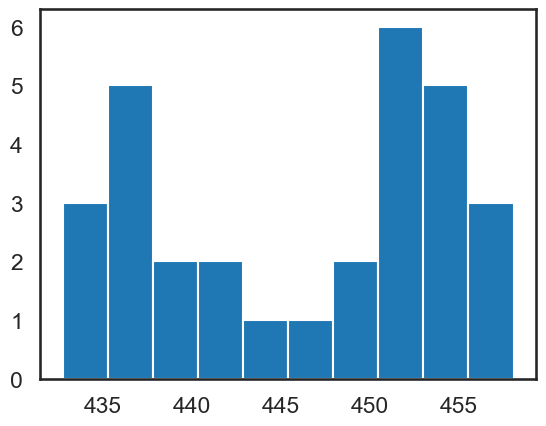

In [21]:
plt.hist(foo["cost_IPTsc_overhead_low"])

(array([3., 5., 2., 2., 1., 1., 2., 6., 5., 3.]),
 array([3558.142 , 3578.9952, 3599.8484, 3620.7016, 3641.5548, 3662.408 ,
        3683.2612, 3704.1144, 3724.9676, 3745.8208, 3766.674 ]),
 <BarContainer object of 10 artists>)

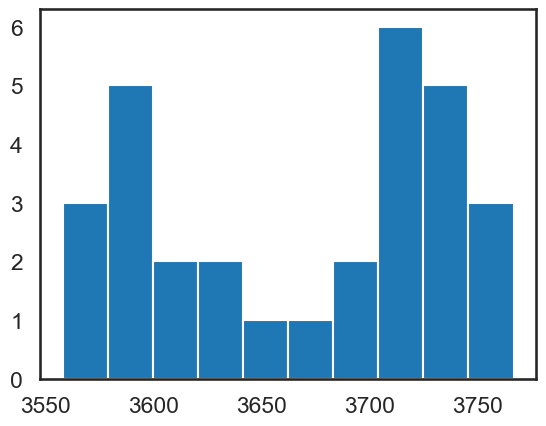

In [22]:
plt.hist(foo["cost_IPTsc_overhead_high"])